#### Data Analyst: Reuben Yohanna Vandi
# Tukshopp Online Delivery: Most Preferred means of Ordering

### Problem Statement
TukShopp online delivery service is seeking to optimize its ordering process and product offerings to enhance customer satisfaction and increase sales, but lacks a clear understanding of its customers' preferred ordering channels and most frequently ordered product types, leading to potential inefficiencies and missed opportunities.

### Research Objective
To investigate the most preferred ordering channels and most frequently ordered product types among Talk Shop's online delivery customers.

In [1]:
#Importing Python libraries
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
#Loading dataset
data = pd.read_csv(r"C:\Users\Reuben Yohanna Vandi\Documents\TukShopp Delivery App Survey.csv", index_col='ID') 

In [3]:
pd.set_option('display.max_rows', 173)

In [4]:
data

,How do you usually place your orders?,Which type of products do you most frequently order online?
ID,,
1,Mobile App;WhatsApp/Instagram,Meals from Restaurants;Groceries
2,Mobile App;Website;WhatsApp/Instagram,Meals from Restaurants;Clothings
3,Mobile App,Electronics/Gadgets
4,Mobile App,Electronics/Gadgets
5,WhatsApp/Instagram,Meals from Restaurants
6,Website,Meals from Restaurants;Groceries;Electronics/G...
7,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Groceries
8,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Beverages;Electronics/G...
9,WhatsApp/Instagram,Electronics/Gadgets


In [5]:
#Identifying unique values in other to remove/replace errors ('nan, 'none', 'Nop') and get clarity of it content
data['How do you usually place your orders?'].unique()

array(['Mobile App;WhatsApp/Instagram',
       'Mobile App;Website;WhatsApp/Instagram', 'Mobile App',
       'WhatsApp/Instagram', 'Website',
       'Website;Phone Call;WhatsApp/Instagram', 'Phone Call',
       'Mobile App;Website',
       'Mobile App;Website;Phone Call;WhatsApp/Instagram',
       'Mobile App;Phone Call;WhatsApp/Instagram', 'Website;',
       'Website;Phone Call', 'Phone Call;',
       'Phone Call;WhatsApp/Instagram', 'Website;WhatsApp/Instagram',
       'Mobile App;Mobile App or WhatsApp or Phone Call works fine for me.',
       'Mobile App;Phone Call', 'Store', 'Mobile App;Website;Phone Call',
       nan, 'none', 'Nop'], dtype=object)

In [6]:
#Identifying unique values in other to remove/replace errors ('NaN', 'I','Question 1 answers this') and get clarity of it content
data['Which type of products do you most frequently order online?'].unique()

array(['Meals from Restaurants;Groceries',
       'Meals from Restaurants;Clothings', 'Electronics/Gadgets',
       'Meals from Restaurants',
       'Meals from Restaurants;Groceries;Electronics/Gadgets',
       'Meals from Restaurants;Beverages;Electronics/Gadgets',
       'Skincare products ', 'Underwear ', 'Beverages',
       'Clothes and other assesories ',
       'Meals from Restaurants;Electronics/Gadgets',
       'Electronics/Gadgets;', 'Meals from Restaurants;',
       'Textiles, jewelry ', 'Pharmacetical Products;Clothes',
       'Groceries;Pharmacetical Products;Electronics/Gadgets;Cloths and shoes',
       'I', 'Groceries',
       'Meals from Restaurants;Groceries;Pharmacetical Products;Beverages;Electronics/Gadgets',
       'Question 1 answers this',
       'Meals from Restaurants;Groceries;Beverages',
       'Pharmacetical Products', 'Clothes ',
       "It's Groceries I've been looking for o. I thought GoLemon would be here, but they're only in Lagos.",
       'Meals from 

In [7]:
#Removal of null/NaN or blank spaces
data.dropna(axis='index', how ='all', subset=['How do you usually place your orders?', 'Which type of products do you most frequently order online?'], inplace=True)
data

,How do you usually place your orders?,Which type of products do you most frequently order online?
ID,,
1,Mobile App;WhatsApp/Instagram,Meals from Restaurants;Groceries
2,Mobile App;Website;WhatsApp/Instagram,Meals from Restaurants;Clothings
3,Mobile App,Electronics/Gadgets
4,Mobile App,Electronics/Gadgets
5,WhatsApp/Instagram,Meals from Restaurants
6,Website,Meals from Restaurants;Groceries;Electronics/G...
7,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Groceries
8,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Beverages;Electronics/G...
9,WhatsApp/Instagram,Electronics/Gadgets


In [8]:
#Replacement/correction of error data
data['How do you usually place your orders?'] = data['How do you usually place your orders?'].replace([np.nan, 'none', 'Nop'], 'I dont order')
data['Which type of products do you most frequently order online?'] = data['Which type of products do you most frequently order online?'].replace([np.nan, 'I','Question 1 answers this'], 'I dont order')
data

,How do you usually place your orders?,Which type of products do you most frequently order online?
ID,,
1,Mobile App;WhatsApp/Instagram,Meals from Restaurants;Groceries
2,Mobile App;Website;WhatsApp/Instagram,Meals from Restaurants;Clothings
3,Mobile App,Electronics/Gadgets
4,Mobile App,Electronics/Gadgets
5,WhatsApp/Instagram,Meals from Restaurants
6,Website,Meals from Restaurants;Groceries;Electronics/G...
7,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Groceries
8,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Beverages;Electronics/G...
9,WhatsApp/Instagram,Electronics/Gadgets


In [9]:
#Data correction ('Clothes ', 'Clothings') to 'Clothes'
data['Which type of products do you most frequently order online?'] = data['Which type of products do you most frequently order online?'].replace(['Clothes ', 'Clothings'], 'Clothes')

In [10]:
#Clean up irrelevant delimiter characters
data['How do you usually place your orders?'] = data['How do you usually place your orders?'].str.strip("'/.;'")
data['Which type of products do you most frequently order online?'] = data['Which type of products do you most frequently order online?'].str.strip("'/.;'")
data

,How do you usually place your orders?,Which type of products do you most frequently order online?
ID,,
1,Mobile App;WhatsApp/Instagram,Meals from Restaurants;Groceries
2,Mobile App;Website;WhatsApp/Instagram,Meals from Restaurants;Clothings
3,Mobile App,Electronics/Gadgets
4,Mobile App,Electronics/Gadgets
5,WhatsApp/Instagram,Meals from Restaurants
6,Website,Meals from Restaurants;Groceries;Electronics/G...
7,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Groceries
8,Website;Phone Call;WhatsApp/Instagram,Meals from Restaurants;Beverages;Electronics/G...
9,WhatsApp/Instagram,Electronics/Gadgets


In [11]:
#Response Frequency
order_making = data['How do you usually place your orders?']
order_counter = Counter()
for order in order_making:
    order_counter.update(order.split(';'))
    
print(order_counter)

Counter({'WhatsApp/Instagram': 80, 'Mobile App': 66, 'Phone Call': 53, 'Website': 45, 'I dont order': 2, 'Mobile App or WhatsApp or Phone Call works fine for me': 1, 'Store': 1})


In [12]:
print(order_counter.most_common(4))

[('WhatsApp/Instagram', 80), ('Mobile App', 66), ('Phone Call', 53), ('Website', 45)]


In [13]:
product_type_frq = data['Which type of products do you most frequently order online?']
product_counter = Counter()
for product in product_type_frq:
    product_counter.update(product.split(';'))

print(product_counter)

Counter({'Meals from Restaurants': 74, 'Electronics/Gadgets': 66, 'Groceries': 23, 'Beverages': 10, 'Pharmacetical Products': 10, 'Clothes': 7, 'I dont order': 4, 'Clothings': 1, 'Skincare products ': 1, 'Underwear ': 1, 'Clothes and other assesories ': 1, 'Textiles, jewelry ': 1, 'Cloths and shoes': 1, "It's Groceries I've been looking for o. I thought GoLemon would be here, but they're only in Lagos": 1, 'Clothes, shoes and accessories': 1, 'Accessories and clothing ': 1, 'Clothes,  shoes,  bags and accessories ': 1, 'Clothing materials': 1, 'Shoes and clothing ': 1, 'Hair': 1, 'Clothing/shoes ': 1, 'Shoes': 1, 'I do not really order anything online': 1, 'Clothes/shoes': 1, 'Shoe': 1, 'Cloths and sneakers ': 1, 'Clothes and shoes ': 1, 'Skincare ': 1, 'Accessories ': 1})


In [14]:
print(product_counter.most_common(7))

[('Meals from Restaurants', 74), ('Electronics/Gadgets', 66), ('Groceries', 23), ('Beverages', 10), ('Pharmacetical Products', 10), ('Clothes', 7), ('I dont order', 4)]


In [15]:
order_means = []
users = []

for ORDER in order_counter.most_common(4):
    order_means.append(ORDER[0])
    users.append(ORDER[1])

In [16]:
product_type = []
order_freq = []

for productorder in product_counter.most_common(7):
    product_type.append(productorder[0])
    order_freq.append(productorder[1])

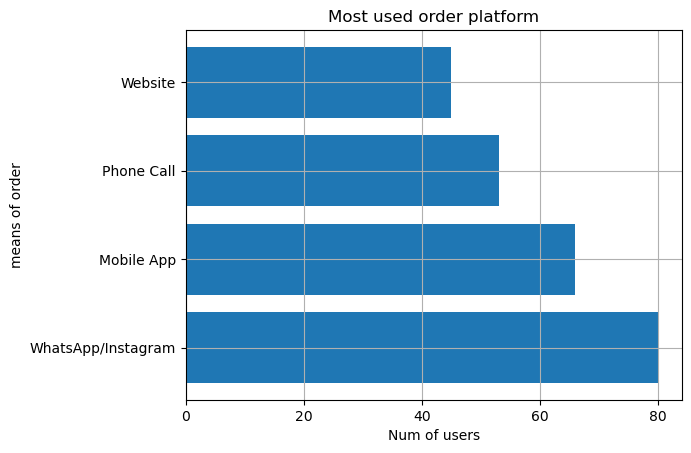

In [17]:
#To create horizontal bar chart visualization for 'How do you usually place your orders?'
plt.barh(order_means, users)
plt.title('Most used order platform')
plt.ylabel('means of order')
plt.xlabel('Num of users')
plt.style.use('fivethirtyeight')
plt.grid()
plt.show()

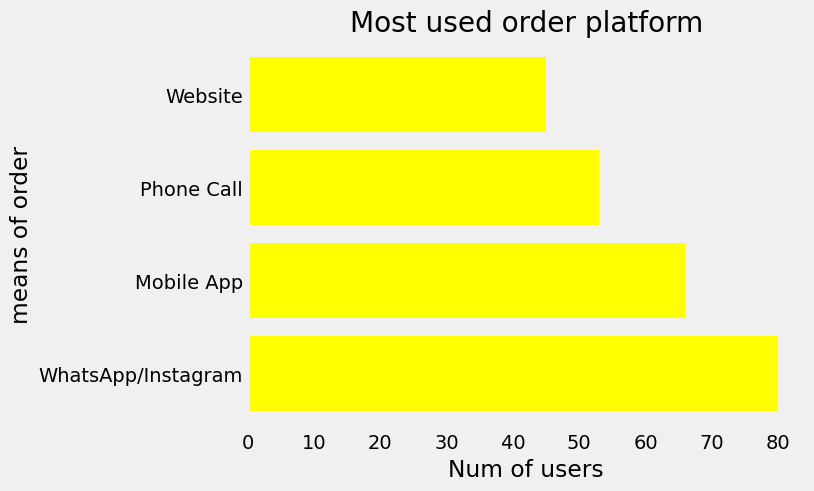

In [18]:
#To rearrange bars from highest to lowest
plt.barh(order_means, users, color='yellow')
order_means.reverse()
users.reverse()
plt.title('Most used order platform')
plt.ylabel('means of order')
plt.xlabel('Num of users')
plt.style.use('fivethirtyeight')
plt.grid()
plt.show()

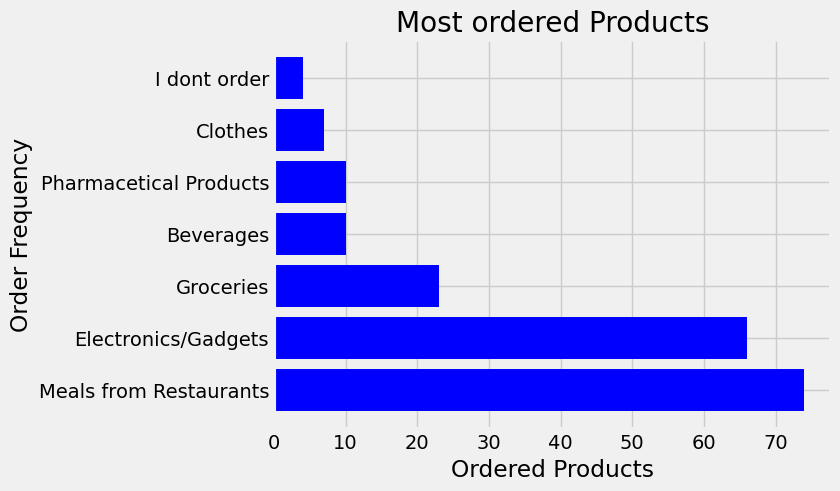

In [19]:
#To create horizontal bar chart visualization for 'Which type of products do you most frequently order online?'
plt.barh(product_type, order_freq, color='blue')
product_type.reverse()
order_freq.reverse()
plt.title('Most ordered Products')
plt.ylabel('Order Frequency')
plt.xlabel('Ordered Products')
plt.show()

# Analysis Results

The analysis of the data from the open-ended survey, which received responses from 173 individuals, reveals that meals from restaurants are the most frequently ordered product type, with 74 responses (42.8%), followed closely by electronics/gadgets with 66 responses (38.2%). Groceries, beverages, pharmaceuticals, and clothes also feature in the top product categories, with 23, 10, 10, and 7 responses, respectively. In terms of ordering channels, WhatsApp/Instagram is the clear winner, with 80 responses (46.2%), accounting for the largest share of responses. Mobile apps and phone calls also remain popular, with 66 and 53 responses, respectively, while the website trails behind with 45 responses.

### Conclusion
The analysis provides valuable insights into the preferences of TukShopp's online delivery customers. The results show that meals from restaurants, electronics/gadgets, and groceries are the most frequently ordered product types, accounting for 77.6% of the total responses. Additionally, WhatsApp/Instagram emerges as the preferred ordering channel, with 38.1% of the responses, followed by mobile apps and phone calls. These findings suggest that TukShopp's customers value convenience, ease of use, and a wide range of product offerings.

### Recommendation
To enhance customer satisfaction and increase sales, it is recommended that TukShopp implements the following strategies:
* Prioritize meals from restaurants, electronics/gadgets, and groceries in its product offerings to cater to customer demand.
* Develop a user-friendly WhatsApp/Instagram ordering system, with clear menus, easy payment options, and prompt customer support.
* Maintain and improve its mobile app and phone call ordering channels to cater to customers who prefer these options. By optimizing its product offerings and ordering process, TukShopp can better meet customer demand, driving business growth and success.